<a href="https://colab.research.google.com/github/ronakbihani123/Unsupervised_ml_algorithm/blob/main/k_means_clustering_unsupervised_ml_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# k means algorithm is used for clustering . clustering means grouping similar data points together .
# k means divide the data into k groups(cluster). where each group contain data points that are more similar to each other than to points in other groups.
# ex = u have a basket of fruits with different sizes and color , kmeans can automatically group them into cluster like apple,banana, grapes without being
# told what the fruit is.


In [ ]:
# how k means works?
# step1 . choose the no of cluster(k) . you decide how many cluster u want if u want to group customer into 3 type then set k = 3
# step 2 . initialize centroid ---> randomly placed k points (centroid) in the datasets . a centroid is like the center of the cluster
# step3 . assign each data point to the nearest centroid --> for each data point we calculate the distance euclidean distance to each centroid ,  it assign the
# point to the cluster with the nearest centroid .
# step 4 --> update centroid --->  once all points are assigned recalculate the centroid of each cluster by taking the average of all points.
# step 5 ---> repeat step 3 and 4 untill convergence ---> reassigning points and updating centroid that this algorithm stops
# when centroid stops moving or a maximum no of iteration is reached.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/mall.csv")

In [ ]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
df = df.drop(columns=["CustomerID" , "Genre"])

In [ ]:
df.head(2)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81


In [ ]:
x = df.iloc[: , [0,1]].values

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt

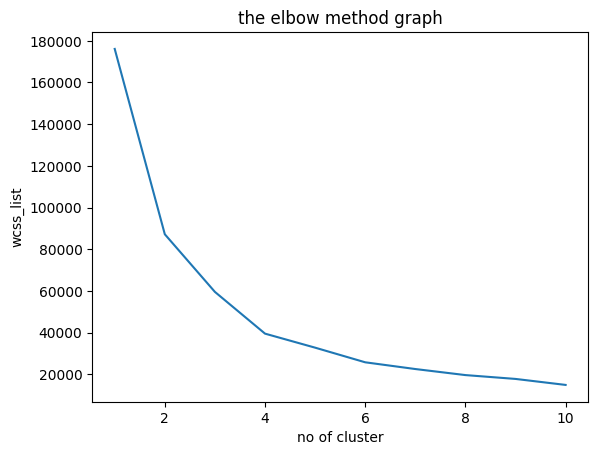

In [ ]:
a = []

for i in range(1,11):
  b = KMeans(n_clusters=i , init="k-means++" , random_state=42)    # n_clusters=i → Number of clusters (k) you want K-Means to form. Here it changes in the loop (1 to 10).
  #  init="k-means++" → Smart way to pick initial centroids so that convergence is faster and results are better (instead of random).
  # random_state=42 → Ensures reproducibility (same results every time you run the code).
  b.fit(x)
  a.append(b.inertia_)

plt.plot(range(1,11) , a)
plt.title("the elbow method graph")
plt.xlabel("no of cluster")
plt.ylabel("wcss_list")
plt.show()

In [ ]:
b = KMeans(n_clusters = 4 , init="k-means++" , random_state=42)
y_predict = b.fit_predict(x)

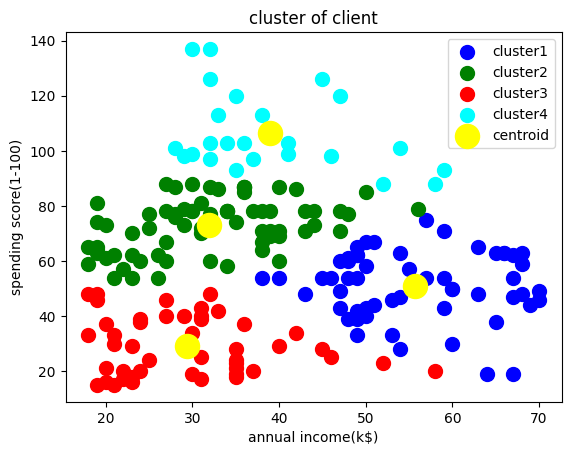

In [ ]:
# visualization the clusters
plt.scatter(x[y_predict==0 , 0] , x[y_predict==0 , 1] , s=100 , c="blue" , label="cluster1")
plt.scatter(x[y_predict==1 , 0] , x[y_predict==1 , 1] , s=100 , c="green" , label="cluster2")
plt.scatter(x[y_predict==2 , 0] , x[y_predict==2 , 1] , s=100 , c="red" , label="cluster3")
plt.scatter(x[y_predict==3 , 0] , x[y_predict==3 , 1] , s=100 , c="cyan" , label="cluster4")

plt.scatter(b.cluster_centers_[:,0] , b.cluster_centers_[:,1] , s=300 , c="yellow" , label="centroid")
plt.title("cluster of client")
plt.xlabel("")
plt.ylabel("spending score(1-100)")
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv("/content/ai_dev_productivity.csv")
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [ ]:
df.isnull().sum()

,0
hours_coding,0
coffee_intake_mg,0
distractions,0
sleep_hours,0
commits,0
bugs_reported,0
ai_usage_hours,0
cognitive_load,0
task_success,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
x = df.drop(columns = ["task_success"])
y = df["task_success"]

In [ ]:
y.value_counts()

,count
task_success,
1,303
0,197


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2 ,random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled , y_resampled  = smote.fit_resample(x_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_resampled , y_resampled)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test , y_pred)

0.9846479500891265

In [ ]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [ ]:
rf = RandomForestRegressor(
    n_estimators=80 ,
    max_features = "sqrt" ,
    max_depth=6,
    max_leaf_nodes=6
)

In [ ]:
rf.fit(x_resampled , y_resampled)

RandomForestRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=6,
                      n_estimators=80)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
r2_score(y_test , y_pred)

0.8969736168630019

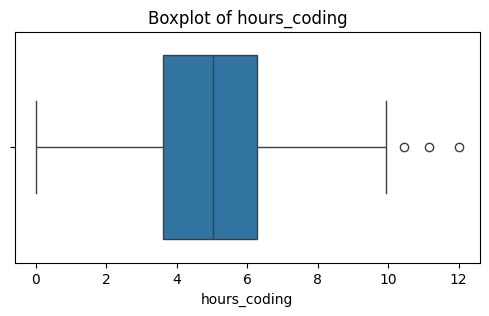

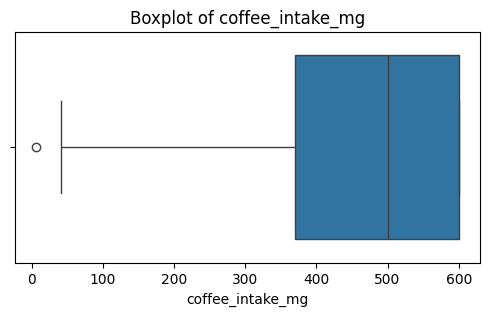

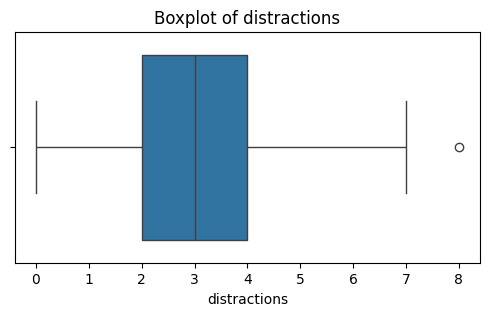

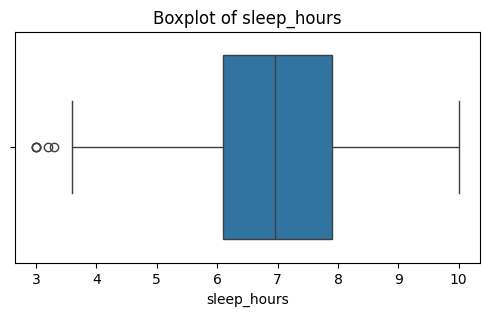

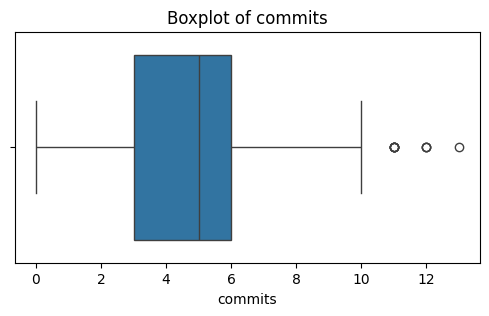

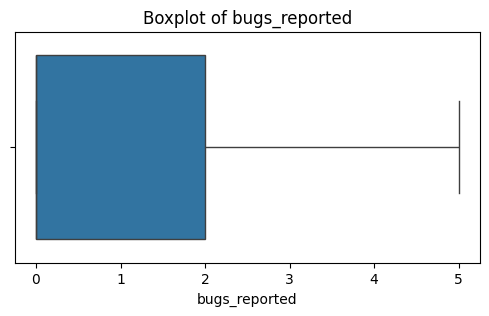

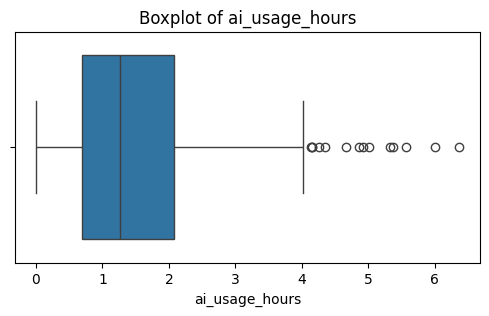

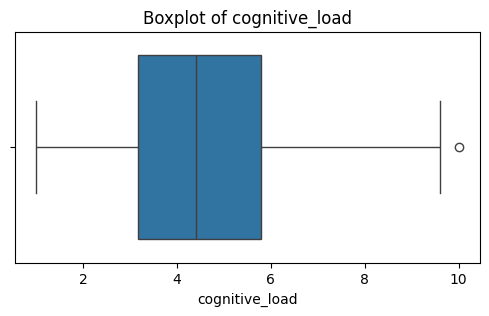

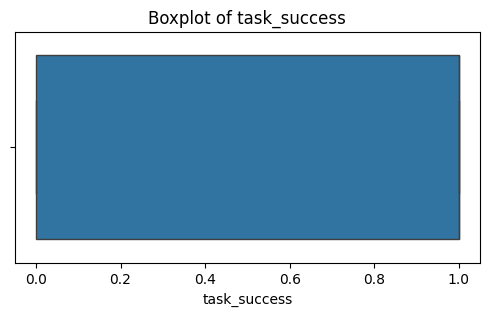

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
def cap_outliers_iqr(df):
    df_capped = df.copy()
    for col in df_capped.select_dtypes(include=['float64','int64']).columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Capping
        df_capped[col] = df_capped[col].apply(
            lambda x: lower if x < lower else (upper if x > upper else x)
        )
    return df_capped

df_capped = cap_outliers_iqr(df)


# Save the cleaned dataset
df_capped.to_csv("ai_dev_productivity_capped.csv", index=False)

print("Outliers capped and cleaned dataset saved as 'ai_dev_productivity_capped.csv'")

Outliers capped and cleaned dataset saved as 'ai_dev_productivity_capped.csv'


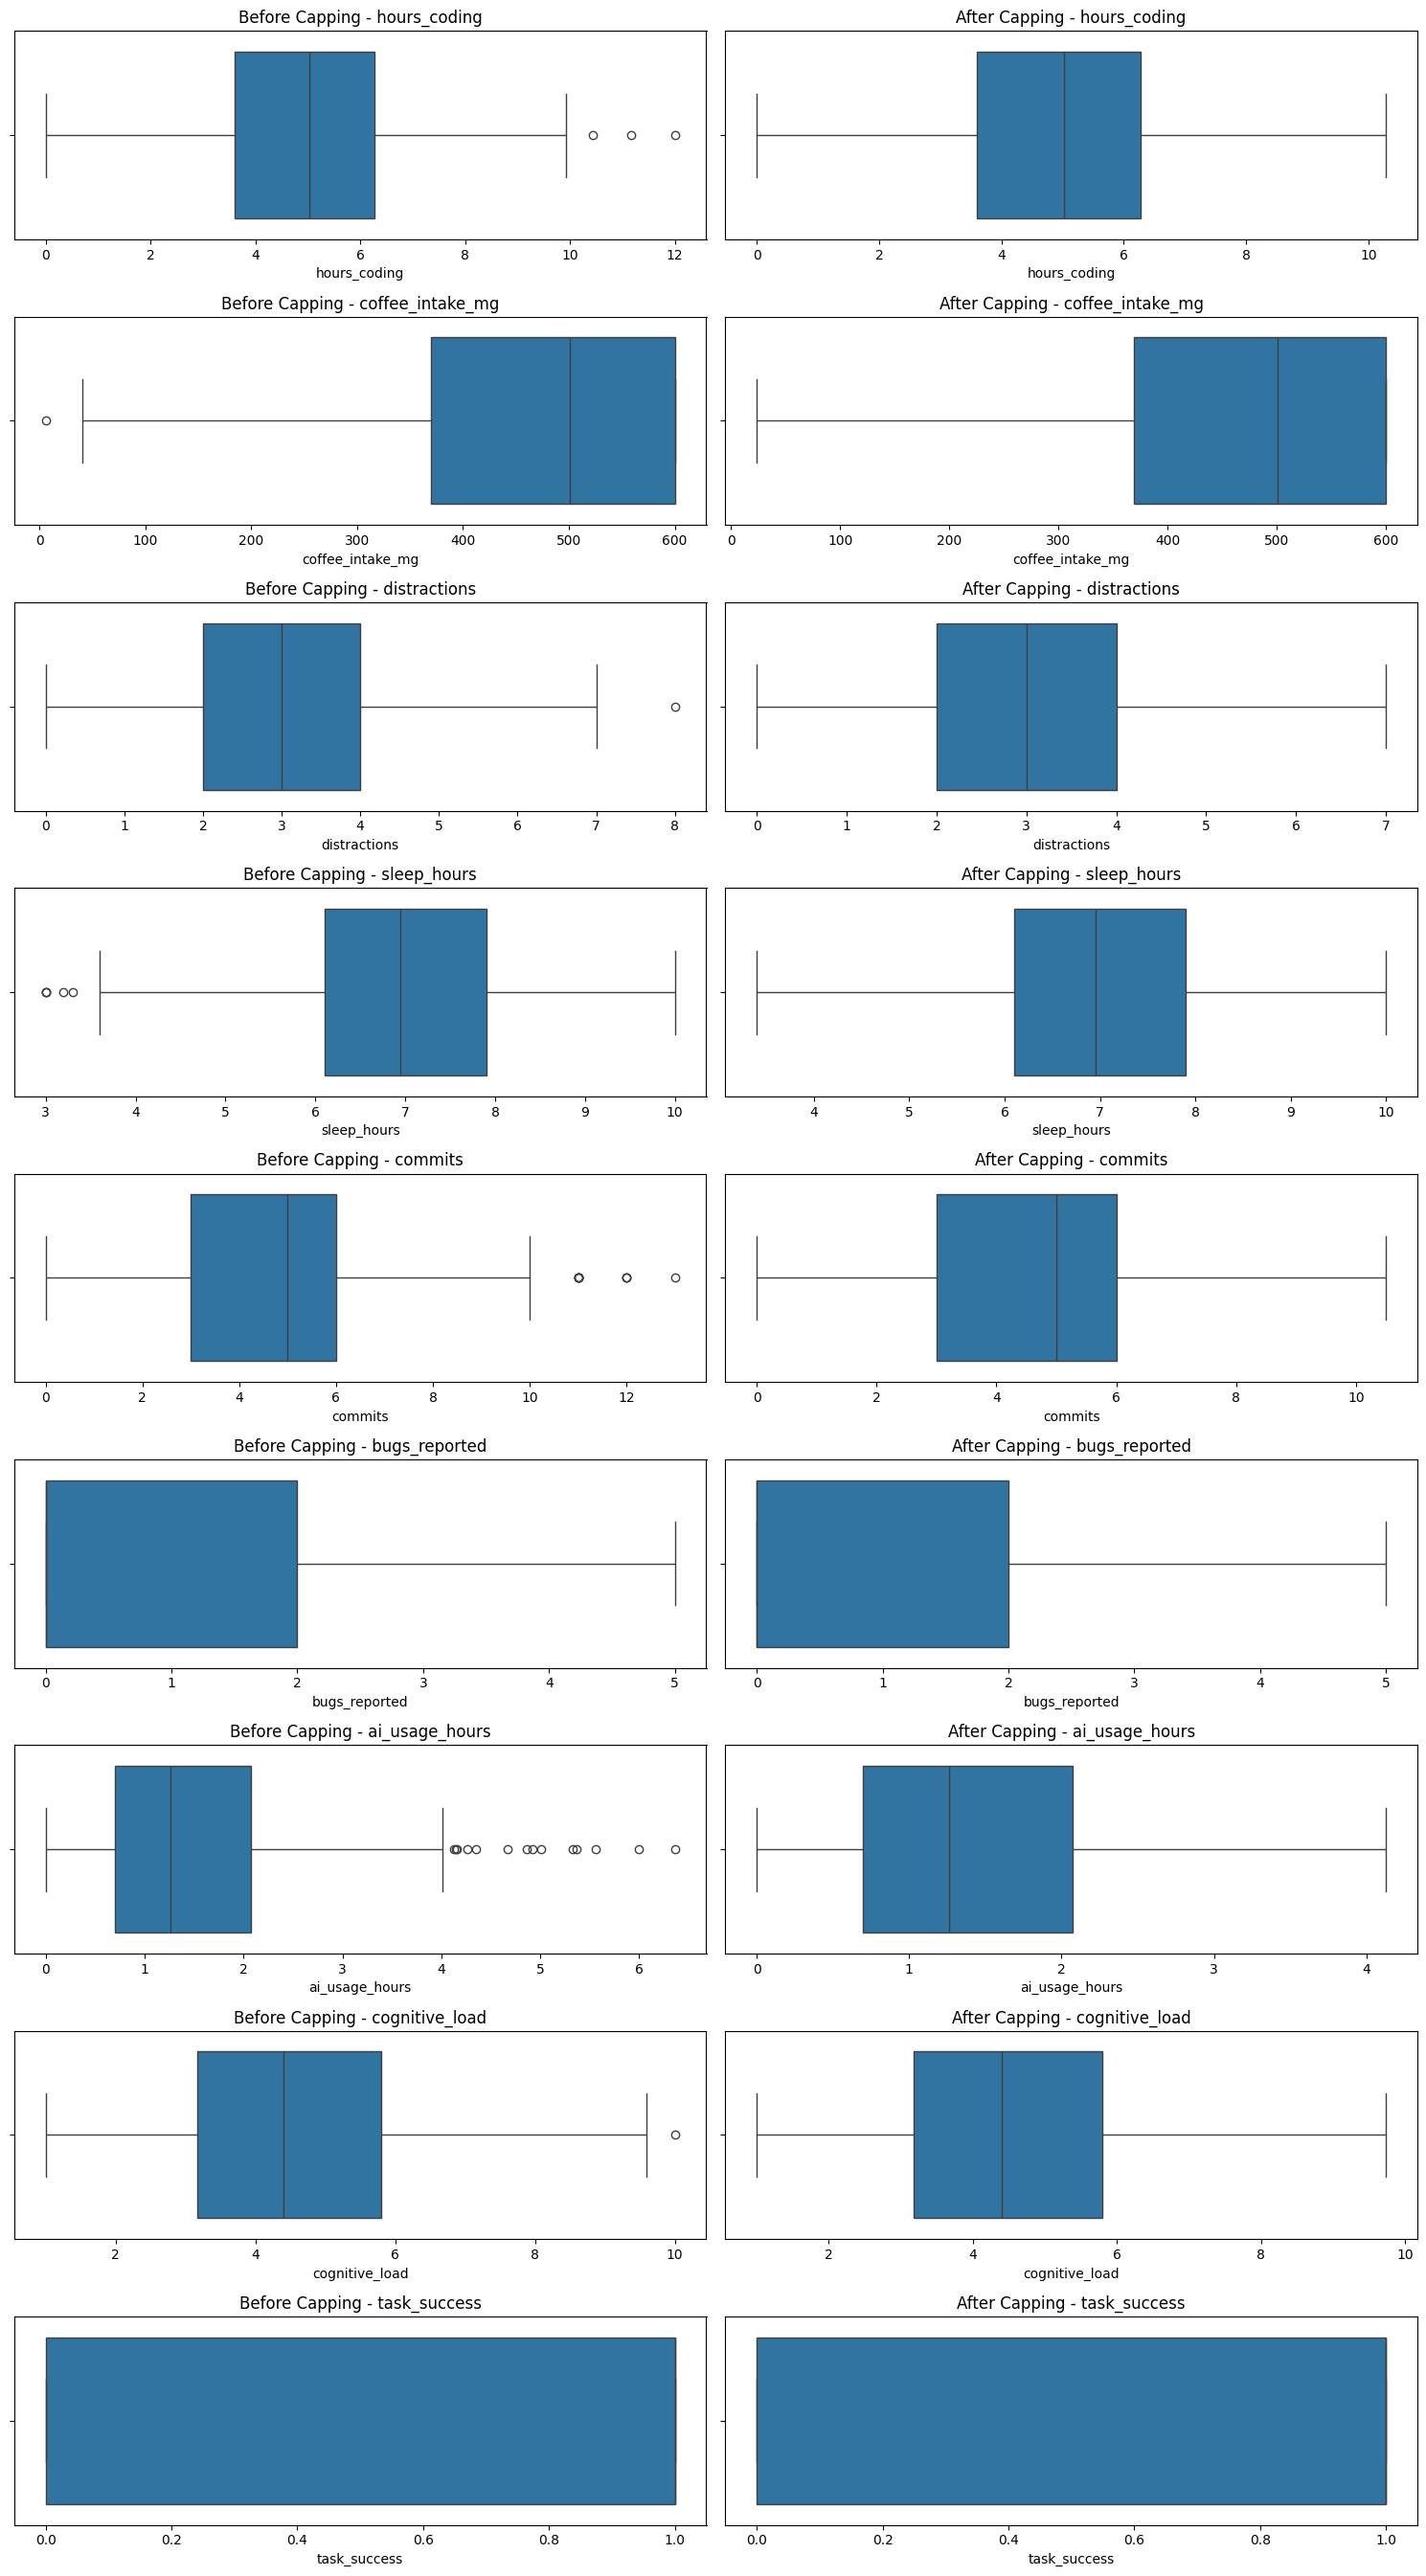

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

# Set figure size dynamically
plt.figure(figsize=(15, len(numeric_cols)*3))

# Loop through each numeric column
for i, col in enumerate(numeric_cols, 1):
    # Before Capping
    plt.subplot(len(numeric_cols), 2, 2*i-1)
    sns.boxplot(x=df[col])
    plt.title(f"Before Capping - {col}")

    # After Capping
    plt.subplot(len(numeric_cols), 2, 2*i)
    sns.boxplot(x=df_capped[col])
    plt.title(f"After Capping - {col}")

plt.tight_layout()
plt.show()
